About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News

In [ ]:
#importing dependecies 
import numpy as py  #use for numpy arrays 
import pandas as pd # panda is use for creating data frame and store data in frames
import re #regular expr searching text  in documnet 
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords    #natural langua tool kit  corpus the body of particular text
from nltk.stem.porter import PorterStemmer #stem gives us the root word for a particular word 
from sklearn.feature_extraction.text import TfidfVectorizer # convert text into vector 
from sklearn.model_selection import train_test_split  #this is use to split our data set into trainig data  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from nltk.metrics import scores
import pickle

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
news_dataset = pd.read_csv('/content/drive/MyDrive/project python/train.csv')

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
#we need to need mising values in our daata set
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
news_dataset = news_dataset.fillna('')

In [ ]:
#merging the author and tittle
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
#seperating data and label
X = news_dataset.drop('label',axis=1)  # removing label from column if we removing from row then we use 0
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming :
stemming is the process of reducing a word to its root word
example:
actor ,actress,acting -> act 

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


now there is now puntuation , capital letter nothing 

In [ ]:
#now we use above content for procesing because if we use data set it contain long paragraph and take too much time to process 
#seperate the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

now the para is in the text for now we convert this text into meaningful number that computer can understand 

DATA MODELLING

In [ ]:
#converting to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

spliting dataset to training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

training the model : logistic regression

evaluation

accuracy score

In [ ]:
#accuracy score in the training data

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier using the training data
model.fit(X_train, Y_train)

# Use the classifier to make predictions on the test data
train_pred = model.predict(X_train)
# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(Y_train, train_pred)

# Use the classifier to make predictions on the test data
test_pred = model.predict(X_test)
# Calculate the accuracy of the classifier
test_accuracy = accuracy_score(Y_test, test_pred)

# Print the accuracy score
print('Accuracy score of the training data : ', train_accuracy)
# Print the accuracy score
print('Accuracy score of the test data : ', test_accuracy)




Accuracy score of the training data :  0.9865985576923076
Accuracy score of the test data :  0.9790865384615385


now show the graph values of logistic regression

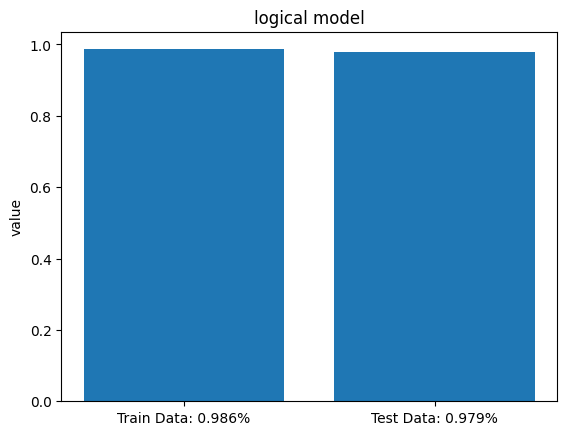

In [ ]:

# Sample data
x = ['Train Data: '+ (str (train_accuracy)[:5]) + "%", 'Test Data: '+(str (test_accuracy)[:5]) + "%"]
y = [train_accuracy, test_accuracy]
# Create a bar chart
plt.bar(x, y)

# Add title and axis labels

plt.title('logical model')
plt.xlabel = ['Train Data: '+ (str (train_accuracy)[:5]) + "%", 'Test Data: '+(str (test_accuracy)[:5]) + "%"]
plt.ylabel('value')

# Show the plot
plt.show()

Training model: passive aggressive classifier

In [ ]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

# Train the classifier using the training data
clf.fit(X_train, Y_train)

# Use the classifier to make predictions on the test data
train_pred = clf.predict(X_train)
# Calculate the accuracy of the classifier
train_accuracy = accuracy_score(Y_train, train_pred)

# Use the classifier to make predictions on the test data
test_pred = clf.predict(X_test)
# Calculate the accuracy of the classifier
test_accuracy = accuracy_score(Y_test, test_pred)

# Print the accuracy score
print("Train Accuracy:", train_accuracy)
# Print the accuracy score
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9925480769230769


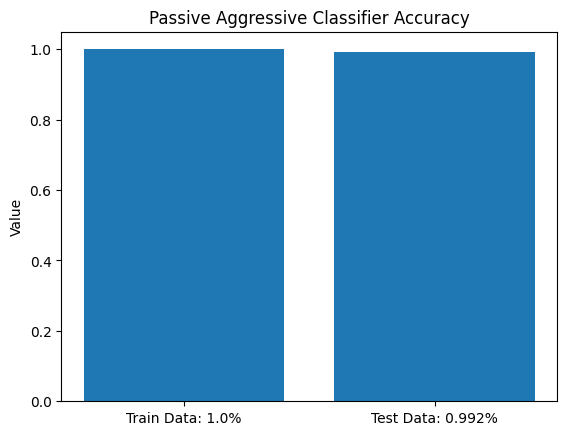

In [ ]:
# Sample data
x = ['Train Data: '+ (str (train_accuracy)[:5]) + "%", 'Test Data: '+(str (test_accuracy)[:5]) + "%"]
y = [train_accuracy, test_accuracy]
# Create a bar chart
plt.bar(x, y)

# Add title and axis labels
plt.title('Passive Aggressive Classifier Accuracy')
plt.xlabel = ['Train Data: '+ (str (train_accuracy)[:5]) + "%", 'Test Data: '+(str (test_accuracy)[:5]) + "%"]
plt.ylabel('Value')

# Show the plot
plt.show()

Naive Bayse Classifier

In [ ]:
MultNB = MultinomialNB()
MultNB.fit(X_train, Y_train)

# Use the classifier to make predictions on the test data
train_prediction = MultNB.predict(X_train)
# Calculate the accuracy of the classifier
train_acc = accuracy_score(Y_train, train_prediction)

test_pred = MultNB.predict(X_test)
# Calculate the accuracy of the classifier
test_acc = accuracy_score(Y_test, test_pred)

# Print the accuracy score
print("Train Accuracy:", train_acc)
# Print the accuracy score
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9782451923076924
Test Accuracy: 0.9550480769230769


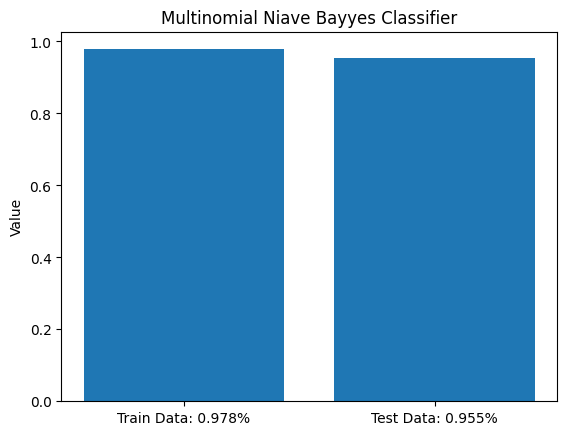

In [ ]:
# Sample data
x = ['Train Data: '+ (str (train_acc)[:5]) + "%", 'Test Data: '+(str (test_acc)[:5]) + "%"]
y = [train_acc, test_acc]
# Create a bar chart
plt.bar(x, y)

# Add title and axis labels
plt.title('Multinomial Niave Bayyes Classifier')
plt.xlabel = ['Train Data: '+ (str (train_acc)[:5]) + "%", 'Test Data: '+(str (test_acc)[:5]) + "%"]
plt.ylabel('Value')

# Show the plot
plt.show()

RANDOM FOREST

In [ ]:
rfc=RandomForestClassifier(n_estimators= 10, random_state= 7)
rfc.fit(X_train,Y_train)

# Use the classifier to make predictions on the test data
train_prediction = rfc.predict(X_train)
# Calculate the accuracy of the classifier
train_acc = accuracy_score(Y_train, train_prediction)

test_pred =  rfc.predict(X_test)
# Calculate the accuracy of the classifier
test_acc = accuracy_score(Y_test, test_pred)

# Print the accuracy score
print("Train Accuracy:", train_acc)
# Print the accuracy score
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9997596153846153
Test Accuracy: 0.9884615384615385


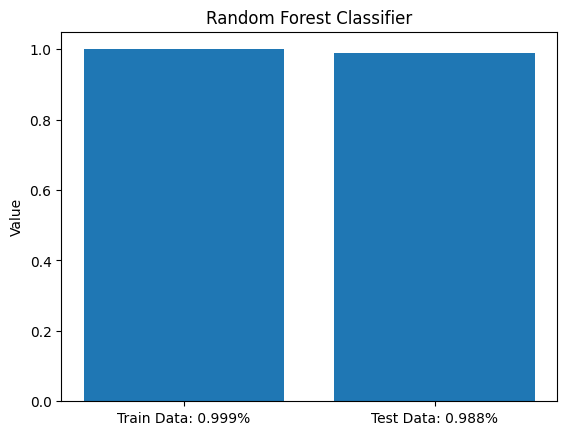

In [ ]:
# Sample data
x = ['Train Data: '+ (str (train_acc)[:5]) + "%", 'Test Data: '+(str (test_acc)[:5]) + "%"]
y = [train_acc, test_acc]
# Create a bar chart
plt.bar(x, y)

# Add title and axis labels
plt.title('Random Forest Classifier')
plt.xlabel = ['Train Data: '+ (str (train_acc)[:5]) + "%", 'Test Data: '+(str (test_acc)[:5]) + "%"]
plt.ylabel('Value')

# Show the plot
plt.show()

Ensemble Learning

In [ ]:
try:
    filename = 'finalized_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, Y_test)
    print(f'Ensemble Learning Accuracy: {round(result*100,2)}%')
except:    
    Ensemb = VotingClassifier( estimators = [('model',model),('clf',clf),('MultNB',MultNB),('rfc',rfc)], voting = 'hard')
    Ensemb.fit(X_train,Y_train)
    Ensemb_pred=Ensemb.predict(X_test)
    filename = 'finalized_model.sav'
    pickle.dump(Ensemb, open(filename, 'wb'))
    score4=accuracy_score(Y_test,Ensemb_pred)
    print(f'Ensemble Learning Accuracy: {round(score4*100,2)}%')



Ensemble Learning Accuracy: 99.13%
